In [1]:
import pandas as pd
import numpy as np
from numpy import linalg as la
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
x_train = pd.read_csv("hw1-data/X_train.csv")
y_train = pd.read_csv("hw1-data/Y_train.csv")
X = x_train
y = y_train

x_test = pd.read_csv("hw1-data/X_test.csv")
y_test = pd.read_csv("hw1-data/Y_test.csv")

In [3]:
def lambda_function(lam):
    vals = []
    U, sigma, V = la.svd(x_train)
    for i in range(len(sigma)):
        vals.append(sigma[i]/(sigma[i] + lam))
        output = sum(vals)
    return output

In [4]:
lam_df = pd.DataFrame(columns = ['Lambda','1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'df(λ)'])


In [5]:
for i in range(5001):
    lam_df.loc[i] = [i,\
                     Ridge(alpha = i).fit(x_train, y_train).coef_[0][0],\
                     Ridge(alpha = i).fit(x_train, y_train).coef_[0][1],\
                     Ridge(alpha = i).fit(x_train, y_train).coef_[0][2], \
                     Ridge(alpha = i).fit(x_train, y_train).coef_[0][3], \
                     Ridge(alpha = i).fit(x_train, y_train).coef_[0][4], \
                     Ridge(alpha = i).fit(x_train, y_train).coef_[0][5], \
                     Ridge(alpha = i).fit(x_train, y_train).coef_[0][6], \
                     lambda_function(i)]
    
    
    
    
    

Text(0, 0.5, '$W_{RR}$ Value')

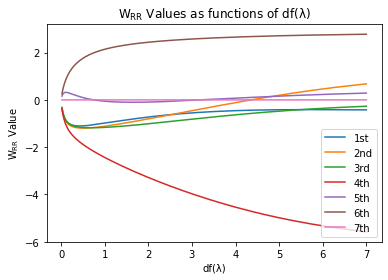

In [6]:
plt.figure()
plt.plot(lam_df['df(λ)'], lam_df['1st'], label = "1st")
plt.plot(lam_df['df(λ)'], lam_df['2nd'], label = "2nd")
plt.plot(lam_df['df(λ)'], lam_df['3rd'], label = "3rd")
plt.plot(lam_df['df(λ)'], lam_df['4th'], label = "4th")
plt.plot(lam_df['df(λ)'], lam_df['5th'], label = "5th")
plt.plot(lam_df['df(λ)'], lam_df['6th'], label = "6th")
plt.plot(lam_df['df(λ)'], lam_df['7th'], label = "7th")
plt.legend()
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.title('$W_{RR}$ Values as functions of df(λ)')
plt.xlabel("df(λ)")
plt.ylabel('$W_{RR}$ Value')
#plt.savefig("w_by_df_lam")


In [7]:
mse_df = pd.DataFrame(columns = ['Lambda', 'MSE'])

for i in range(51):
    rdg = Ridge(alpha = i)
    pred = rdg.fit(x_train, y_train).predict(x_test)
    true = y_test
    store = mse(true, pred, squared = False)
    mse_df.loc[i] = [i, store]

Text(0, 0.5, 'RMSE')

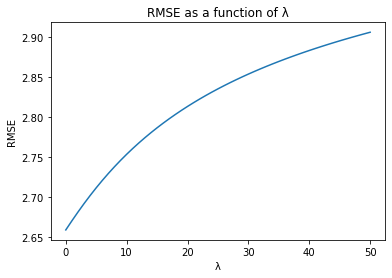

In [8]:
plt.plot(mse_df['Lambda'], mse_df['MSE'])
plt.title("RMSE as a function of λ")
plt.xlabel("λ")
plt.ylabel("RMSE")
#plt.savefig("rmse_by_lam")

In [9]:
#STANDARDIZATION FUNCTION FOR ADDITIONAL FEATURES
def standardize(df, variable):
    numerator = df[variable] - df._get_numeric_data().mean(axis = 0)[variable]
    denominator = df._get_numeric_data().std(axis = 0)[variable]
    df[variable] = numerator/denominator

In [10]:
#MAKING P = 2 X TRAIN/TEST SETS
x_train_p2 = x_train.copy()

x_train_p2['first_sq'] = x_train_p2['0.30957'].apply(lambda x: x**2)
x_train_p2['second_sq'] = x_train_p2['-0.36707'].apply(lambda x: x**2)
x_train_p2['third_sq'] = x_train_p2['0.45545'].apply(lambda x: x**2)
x_train_p2['fourth_sq'] = x_train_p2['-0.20083'].apply(lambda x: x**2)
x_train_p2['fifth_sq'] = x_train_p2['-0.73992'].apply(lambda x: x**2)
x_train_p2['sixth_sq'] = x_train_p2['-0.80885'].apply(lambda x: x**2)


x_test_p2 = x_test.copy()

x_test_p2['first_sq'] = x_test_p2['0.30957'].apply(lambda x: x**2)
x_test_p2['second_sq'] = x_test_p2['0.34964'].apply(lambda x: x**2)
x_test_p2['third_sq'] = x_test_p2['0.013785'].apply(lambda x: x**2)
x_test_p2['fourth_sq'] = x_test_p2['0.52674'].apply(lambda x: x**2)
x_test_p2['fifth_sq'] = x_test_p2['0.49248'].apply(lambda x: x**2)
x_test_p2['sixth_sq'] = x_test_p2['0.277'].apply(lambda x: x**2)

In [11]:
#STANDARDIZING NEW COLUMNS IN P2 LARRIES
new_cols = [x for x in x_test_p2.columns if "sq" in x]
for col in new_cols:
    standardize(x_test_p2, col)
    standardize(x_train_p2, col)

In [12]:
#MAKING P = 3 X TRAIN/TEST SETS
x_train_p3 = x_train_p2.copy()

x_train_p3['first_cube'] = x_train_p3['0.30957'].apply(lambda x: x**3)
x_train_p3['second_cube'] = x_train_p3['-0.36707'].apply(lambda x: x**3)
x_train_p3['third_cube'] = x_train_p3['0.45545'].apply(lambda x: x**3)
x_train_p3['fourth_cube'] = x_train_p3['-0.20083'].apply(lambda x: x**3)
x_train_p3['fifth_cube'] = x_train_p3['-0.73992'].apply(lambda x: x**3)
x_train_p3['sixth_cube'] = x_train_p3['-0.80885'].apply(lambda x: x**3)



x_test_p3 = x_test_p2.copy()

x_test_p3['first_cube'] = x_test_p3['0.30957'].apply(lambda x: x**3)
x_test_p3['second_cube'] = x_test_p3['0.34964'].apply(lambda x: x**3)
x_test_p3['third_cube'] = x_test_p3['0.013785'].apply(lambda x: x**3)
x_test_p3['fourth_cube'] = x_test_p3['0.52674'].apply(lambda x: x**3)
x_test_p3['fifth_cube'] = x_test_p3['0.49248'].apply(lambda x: x**3)
x_test_p3['sixth_cube'] = x_test_p3['0.277'].apply(lambda x: x**3)

In [13]:
#STANDARDIZING NEW COLUMNS IN P3 LARRIES
new_cols = [x for x in x_test_p3.columns if "cube" in x]
for col in new_cols:
    standardize(x_test_p3, col)
    standardize(x_train_p3, col)

In [14]:
p_mse_df = pd.DataFrame(columns = ['Lambda', 'P=1 MSE', 'P=2 MSE', 'P=3 MSE'])

for i in range(101):
    rdg = Ridge(alpha = i)
    true = y_test
    #P = 1 PRED AND MSE
    pred1 = rdg.fit(x_train, y_train).predict(x_test)
    store1 = mse(true, pred1, squared = False)
    #P = 2 PRED AND MSE
    pred2 = rdg.fit(x_train_p2, y_train).predict(x_test_p2)
    store2 = mse(true, pred2, squared = False)
    #P = 3 PRED AND MSE
    pred3 = rdg.fit(x_train_p3, y_train).predict(x_test_p3)
    store3 = mse(true, pred3, squared = False)
    p_mse_df.loc[i] = [i, store1, store2, store3]

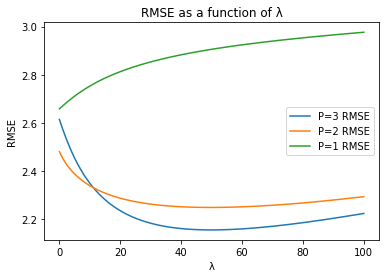

In [15]:
plt.plot(p_mse_df['Lambda'], p_mse_df['P=3 MSE'], label = "P=3 RMSE")
plt.plot(p_mse_df['Lambda'], p_mse_df['P=2 MSE'], label = "P=2 RMSE")
plt.plot(p_mse_df['Lambda'], p_mse_df['P=1 MSE'], label = "P=1 RMSE")
plt.title("RMSE as a function of λ")
plt.xlabel("λ")
plt.ylabel("RMSE")
plt.legend()
plt.savefig("all_rmse_by_lam")